<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-–-Energy-Systems-Course-at-University-of-Calgary" data-toc-modified-id="Machine-Learning-–-Energy-Systems-Course-at-University-of-Calgary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine Learning – Energy Systems Course at University of Calgary</a></span></li><li><span><a href="#Deep-Neural-Network-(DNN)" data-toc-modified-id="Deep-Neural-Network-(DNN)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deep Neural Network (DNN)</a></span></li><li><span><a href="#Vanishing/Exploding-Gradients-Problem" data-toc-modified-id="Vanishing/Exploding-Gradients-Problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vanishing/Exploding Gradients Problem</a></span><ul class="toc-item"><li><span><a href="#He-Initialization" data-toc-modified-id="He-Initialization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>He Initialization</a></span></li><li><span><a href="#Activation-Functions" data-toc-modified-id="Activation-Functions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Activation Functions</a></span><ul class="toc-item"><li><span><a href="#Leaky-Relu" data-toc-modified-id="Leaky-Relu-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Leaky Relu</a></span></li><li><span><a href="#Exponential-Linear-Unit-(ELU)" data-toc-modified-id="Exponential-Linear-Unit-(ELU)-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Exponential Linear Unit (ELU)</a></span></li></ul></li><li><span><a href="#Batch-Normalization" data-toc-modified-id="Batch-Normalization-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Batch Normalization</a></span></li></ul></li><li><span><a href="#Optimizers" data-toc-modified-id="Optimizers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Optimizers</a></span></li><li><span><a href="#Avoiding-Overfitting-by-Regularization" data-toc-modified-id="Avoiding-Overfitting-by-Regularization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Avoiding Overfitting by Regularization</a></span><ul class="toc-item"><li><span><a href="#Ridge-(L2-)-and-Lasso-(L1-)-Regularization" data-toc-modified-id="Ridge-(L2-)-and-Lasso-(L1-)-Regularization-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Ridge (L2 ) and Lasso (L1 ) Regularization</a></span></li><li><span><a href="#Dropout" data-toc-modified-id="Dropout-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Dropout</a></span></li></ul></li><li><span><a href="#Energy-Efficiency-Data-set" data-toc-modified-id="Energy-Efficiency-Data-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Energy Efficiency Data set</a></span></li><li><span><a href="#Fine-Tune-Hyperparameters" data-toc-modified-id="Fine-Tune-Hyperparameters-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fine Tune Hyperparameters</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Regression</a></span></li></ul></li></ul></div>

# Machine Learning – Energy Systems Course at University of Calgary

* Instructor: [Mehdi Rezvandehy](https://www.linkedin.com/in/mehdi-rezvandehy-ph-d-70a40b52/)

# Deep Neural Network (DNN)

Last lecture, we discussed artificial neural networks. But they were very shallow with a few hidden layers. In case of a very complex problem, a much deeper neural network should be trained; for example 10 layers or much more, each layer with hundreds or thousands of  neurons. 

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/Fig_DDL1.png " alt="drawing" width="400"/>



This would not be an easy task because we may face some challenges:

* Vanishing gradients or exploding gradients problem.
* Requiring many training samples.
* It can be very slow and computationally expensive.
* Deep model has a higher risk of overfitting. 


# Vanishing/Exploding Gradients Problem

The backpropagation algorithm works by going from the output layer to the input layer, propagating the error gradient on the way. Once the algorithm has computed the gradient of the cost function with regards to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step  (see previous lectures).


$\large w^{u}=w-\alpha \frac{\partial MSE}{\partial w}$


Unfortunately, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower layer connection weights virtually unchanged, and training never converges to a good solution. This is called the **vanishing gradients problem**. In some cases, the opposite can happen: the gradients can grow bigger and bigger, so many layers get insanely large weight updates and the algorithm diverges. This is the **exploding gradients problem**. 

## He Initialization

When weights for neural network initialize randomly, there will be higher likelihood for vanishing and exploding problem. A way to resolve this problem is the variance of the outputs of each layer to be equal to the variance of its inputs. Random weights should be initialized with a variance achieved from input variance called He Initialization, or averaged of input and output variances (Glorot Initialization, which is usually used for sigmoid function that we do not consider here).

*He Initialization* can be simply applied in Keras by setting kernel_initializer="he_uniform" for uniform distribution or kernel_initializer="he_normal" for normal distribution as below:

In [1]:
# keras.layers.Dense(neurons=100, activation='relu', kernel_initializer="he_uniform")
# keras.layers.Dense(neurons=100, activation='relu', kernel_initializer="he_normal")

## Activation Functions

Another reason for vanishing/exploding gradients problems is due to unreliable activation function. People had assumed that sigmoid activation functions in biological neurons was the best activation, but it was proved vanishing/exploding gradients problems usually happens for deep neural network (DNN) because of zero gradient for high negative and positive values. There are other activation functions work much better than sigmoid function for DNN. Relu activation has been widely used because it is so fast and the gradient is not zero for positive values.

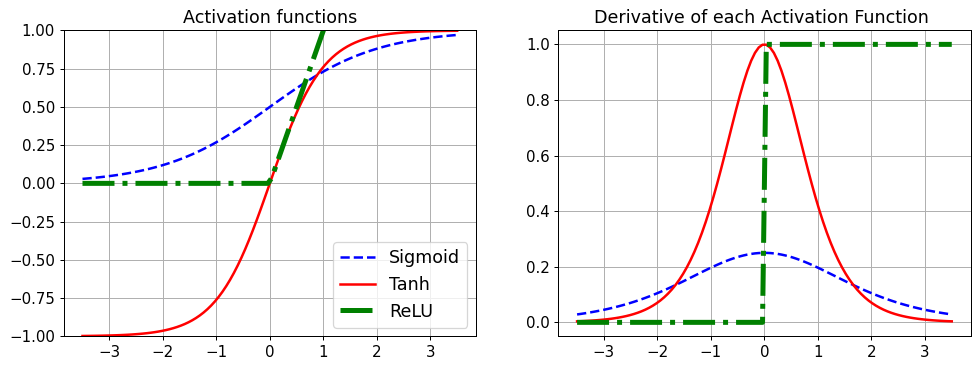

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import random

font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(13.0, 4.5), dpi= 90, facecolor='w', edgecolor='k')

z1 = np.linspace(-3.5, 3.5, 100)
#
def sgd(y):
    return 1 / (1 + np.exp(-y))

def relu(y):
    return np.maximum(0, y)

def drivtve(f, y):
    return (f(z1 + 0.000001) - f(z1 - 0.000001))/(2 * 0.000001)
#
plt.subplot(1,2,1)
plt.plot(z1, sgd(z1), "b--", linewidth=2, label="Sigmoid")
plt.plot(z1, np.tanh(z1), "r-", linewidth=2, label="Tanh")
plt.plot(z1, relu(z1), "g-.", linewidth=4, label="ReLU")
plt.grid(True)
plt.legend(loc=4, fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.ylim(-1,1)

plt.subplot(1,2,2)
plt.plot(z1, drivtve(sgd, z1), "b--", linewidth=2, label="Sigmoid")
plt.plot(z1, drivtve(np.tanh, z1), "r-", linewidth=2, label="Tanh")
plt.plot(z1, drivtve(relu, z1), "g-.", linewidth=4, label="ReLU")
plt.grid(True)
plt.title("Derivative of each Activation Function ", fontsize=14)

plt.show()

Unfortunately, the Relu activation function suffers from vanishing or dying neurons: during training, the gradient of the Relu function is 0 when its input is **negative** so the gradient descent does not have any affect by running iteration. Leaky Relu has been developed to solve this problem. The gradient is not zero for negative values. See Figure below:

### Leaky Relu

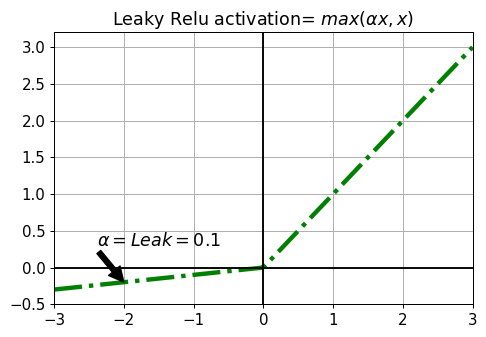

In [3]:
font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(6, 4), dpi= 90, facecolor='w', edgecolor='k')

def relu_leaky(y, alpha=0.01):
    return np.maximum(alpha*y, y)
y = np.linspace(-3, 3, 100)
plt.plot(y, relu_leaky(y, 0.1), "g-.", linewidth=3.5)
plt.plot([-3, 3], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
p = dict(facecolor='black')
plt.annotate(r'$\alpha=Leak=0.1$', xytext=(-1.5, 0.3), xy=(-2, -0.2), arrowprops=p, fontsize=14, ha="center")
plt.title('Leaky Relu activation= ' + r'$max(\alpha x,x)$', fontsize=14)
plt.axis([-3, 3, -0.5, 3.2])
plt.show()

**α = 0.2** (huge leak) usually gives better performance than **α = 0.01** (small leak). This hyperparameter can be adjusted with GridsearchCV. The following code shows how Leaky Relu can be implemented:

In [4]:
# leaky_relu = keras.layers.LeakyReLU(alpha=0.2)  # Leaky Relu with alpha=0.1
# keras.layers.Dense(neurons=100, activation='relu', kernel_initializer="he_uniform")  # Relu activation
# keras.layers.Dense(neurons=100, activation=leaky_relu, kernel_initializer="he_normal") # Leaky Relu activation

Instead of using a linear function for leak, an exponential function can be applied, called the exponential linear unit (**ELU**) that often gives higher performance than the all the Relue variants (see below).

### Exponential Linear Unit (ELU)

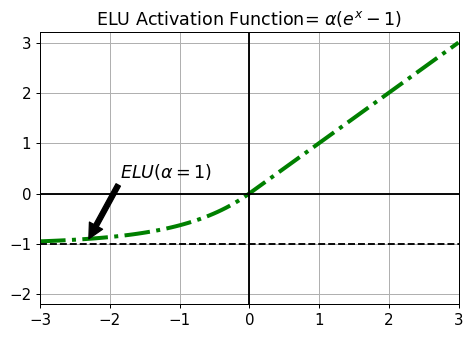

In [5]:
font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(6, 4), dpi= 90, facecolor='w', edgecolor='k')

def ELU(y, alpha=1.0):
    return np.where(y < 0, alpha * (np.exp(y) - 1), y)
plt.plot(y, ELU(y), "g-.", linewidth=3.2)
plt.plot([-3, 3], [0, 0], 'k-')
plt.plot([-3, 3], [-1.0, -1.0], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.annotate(r'$ELU(\alpha=1)$', xytext=(-1.2, 0.3), xy=(-2.3, -0.9), arrowprops=p, fontsize=14, ha="center")
plt.title('ELU Activation Function= ' + r'$\alpha (e^{x}-1)$', fontsize=14)
plt.axis([-3,3 , -2.2, 3.2])

plt.show()

ELU can be simply implemented as below:

In [6]:
# keras.layers.Dense(neurons=100, activation='elu', kernel_initializer="he_uniform")  # Relu activation

So the question is which activation function we should use. In general, the performance for DNN is **> ELU > leaky Relu (and its variants) > Relu > tanh> logistic**.  Gridsearchcv can also be applied to have better selection if you have time. However, Relu is commonly used for very DNN because it is so fast. See [Aurélien Géron, 2019]() for more information.

## Batch Normalization 

Vanishing/exploding gradients problems can be significantly reduced at the beginning of training by using He initialization along with ELU (or any variant of ReLU); however, it cannot ensure that they won’t come back during training.

Batch Normalization is another technique to help reducing vanishing/exploding gradients problems. The technique consists of adding an operation in the model just **before or after the activation function of each hidden layer, simply zero-centering and normalizing each input, then scaling and shifting the result using two new parameter vectors per layer: one for scaling, the other for shifting [Aurélien Géron, 2019]().** It can be simply implemented as below:


In [7]:
# keras.layers.BatchNormalization()
# keras.layers.Dense(neurons=100, activation='relu', kernel_initializer="he_uniform")  # Relu activation
# keras.layers.BatchNormalization()
# keras.layers.Dense(neurons=100, activation=leaky_relu, kernel_initializer="he_normal") # Leaky Relu activation
# keras.layers.BatchNormalization()

# Optimizers

As discussed in previous lecture, Gradient Descent can be applied to optimize random weights. Training a very large deep neural network can be painfully slow. Stochastic gradient descent (SGD) can be used in DNN to speed up the training. However, SGD is so random and may not settle in global minimum.

We have seen three ways to speed up training (and reach a better solution): using a good initialization, applying a reliable activation function, applying Batch Normalization. Another significant speed boost can come from using a faster optimizer than the regular Gradient Descent optimizer. There are faster optimizer as below:

* Nesterov
* Adagrad
* Adadelta
* **RMSprop** 
* **Adam** 
* Nadam
* Adamax

The highlighted optimizers **Adam** or **RMSprop** are the most reliable optimizers that should be tried first for DNN (see [Aurélien Géron, 2019]() for more details about optimizers). Gridsearchcv can be applied to fine-tune optimizers.

#  Avoiding Overfitting by Regularization

We applied *early stoping* in Neural Network to avoid overfitting. There are regularization techniques to avoid overfitting as below:

## Ridge (L2 ) and Lasso (L1 ) Regularization

Ridge (L2 ) and Lasso (L1 ) were discussed on lecture 6 Model-Training. These regularization techniques can also be applied for Neural Network. **Generally L2 regularization will produce better overall performance than L1**. See implementation below:

In [8]:
# keras.layers.Dense(neurons=100, activation="elu",kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2)

## Dropout

One of the most popular regularization techniques for deep neural networks is Dropout. It is proven to be highly successful and efficient: 1–2% increase in accuracy can be achieved for even the state-of-the-art neural networks by adding dropout


It is very simple algorithm: at every training step, every neuron (including the input neurons, *but always excluding the output neurons*) has a probability p of being temporarily “dropped out,” meaning it will be entirely ignored during this training step, but it may be active during the next step. The hyperparameter p is called the dropout rate. 

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/FigDL-4.png " alt="drawing" width="700"/>

<p>&nbsp;</p>

To implement dropout using Keras, you can use the keras.layers.Dropout layer. **It randomly drops some inputs (setting them to 0).** The following code implement dropout for 30 %.

In [9]:
# keras.layers.Dense(neurons=100, activation="elu",kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2)
# keras.layers.Dropout(0.3)

# Energy Efficiency Data set

Lets apply ANN for Energy Efficiency data set for binary classification. First get training data:

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('./Data/Building_Heating_Load.csv',na_values=['NA','?',' '])
np.random.seed(32) 
df=df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
#
df_binary=df.copy()
df_binary.drop(['Heating Load','Multi-Classes'], axis=1, inplace=True)
#
df_binary['Binary Classes']=df_binary['Binary Classes'].replace('Low Level', 0)
df_binary['Binary Classes']=df_binary['Binary Classes'].replace('High Level', 1)

# Training and Test
spt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in spt.split(df_binary, df_binary['Binary Classes']):
    train_set = df_binary.loc[train_idx]
    test_set  = df_binary.loc[test_idx]  

#    
X_train = train_set.drop("Binary Classes", axis=1)
y_train = train_set["Binary Classes"].values
#   
scaler = StandardScaler()
X_train_Std=scaler.fit_transform(X_train)
    
# Smaller Training
# You need to divid your data to smaller training set and validation set for early stopping.
Training_c=np.concatenate((X_train_Std,np.array(y_train).reshape(-1,1)),axis=1)
Smaller_Training, Validation = train_test_split(Training_c, test_size=0.2, random_state=100)
#
Smaller_Training_Target=Smaller_Training[:,-1]
Smaller_Training=Smaller_Training[:,:-1]
#
Validation_Target=Validation[:,-1]
Validation=Validation[:,:-1]


In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
import matplotlib.pyplot as plt

def plot(history):

    font = {'size'   : 10}
    plt.rc('font', **font)
    fig, ax=plt.subplots(figsize=(12, 4), dpi= 110, facecolor='w', edgecolor='k')
    
    ax1 = plt.subplot(1,2,1)
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')          
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss',linewidth=2)    
    plt.title('Training and Validation Loss',fontsize=14)
    plt.xlabel('Epochs (Early Stopping)',fontsize=12)
    plt.ylabel('Loss',fontsize=11)
    plt.legend(fontsize='12')
#    plt.ylim((0, 0.8))
    
    ax2 = plt.subplot(1,2,2)    
    history_dict = history.history
    loss_values = history_dict['accuracy']
    val_loss_values = history_dict['val_accuracy']
    epochs = range(1, len(loss_values) + 1)
    ax2.plot(epochs, loss_values, 'ro', label='Training accuracy')          
    ax2.plot(epochs, val_loss_values, 'b', label='Validation accuracy',linewidth=2)    
    plt.title('Training and Validation Accuracy',fontsize=14)
    plt.xlabel('Epochs (Early Stopping)',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    plt.legend(fontsize='12')
#    plt.ylim((0.8, 0.99))
    plt.show()

In [13]:
input_dim=Smaller_Training.shape[1]
neurons=50
loss="binary_crossentropy"
activation="relu"
metrics=['accuracy']
activation_out='sigmoid'


np.random.seed(42)
tf.random.set_seed(42)

keras.backend.clear_session() # Clear the previous model

model = keras.models.Sequential()

# Input & Hidden Layer 1
model.add(keras.layers.Dense(neurons,input_dim=input_dim, activation=activation))
    
# Hidden Layer 2
model.add(keras.layers.Dense(neurons,activation=activation)) 
    
# Hidden Layer 3    
model.add(keras.layers.Dense(neurons,activation=activation)) 

# Hidden Layer 4
model.add(keras.layers.Dense(neurons,activation=activation)) 
    
# Hidden Layer 5    
model.add(keras.layers.Dense(neurons,activation=activation)) 

# Output Layer 
model.add(keras.layers.Dense(1,activation=activation_out)) 
    
# Compile model
model.compile(optimizer='adam',loss=loss,metrics=metrics)
          
# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=3)
history=model.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
          (Validation,Validation_Target),callbacks=[monitor],verbose=1,epochs=1000)          

Epoch 1/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.6299 - accuracy: 0.7026 - val_loss: 0.5107 - val_accuracy: 0.7886
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8126 - val_loss: 0.3251 - val_accuracy: 0.8049
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8839 - val_loss: 0.2440 - val_accuracy: 0.9106
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9124 - val_loss: 0.2075 - val_accuracy: 0.9106
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9246 - val_loss: 0.2062 - val_accuracy: 0.9106
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9369 - val_loss: 0.1906 - val_accuracy: 0.9024
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9348 - val_loss: 0.2178 - val_accuracy: 0.9187
Epoch

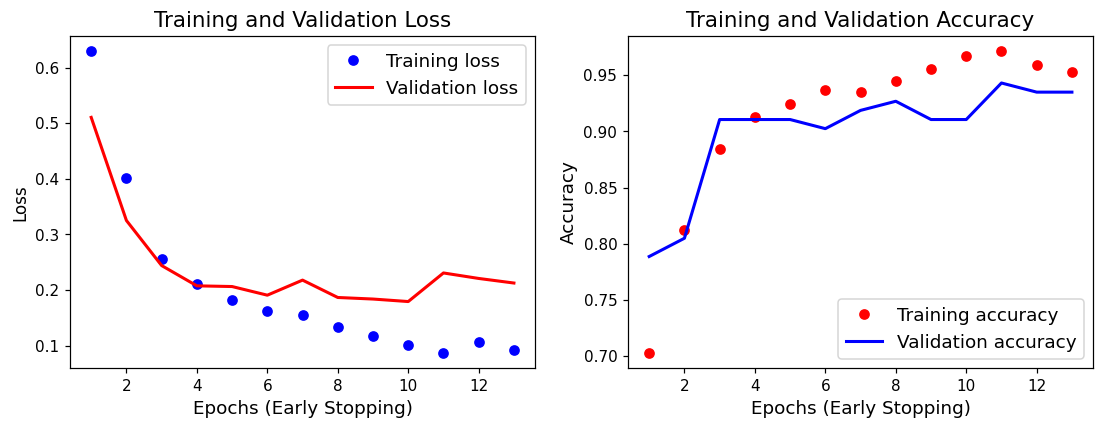

In [14]:
plot(history)

In [15]:
# Accuracy on training set
from sklearn.metrics import accuracy_score

pred=model.predict(X_train_Std)
pred=[1 if i >= 0.5 else 0 for i in pred]
#
acr=accuracy_score(y_train, pred) 
print(acr)

0.9690553745928339


In [16]:
# Accuracy on test set
X_test = test_set.drop("Binary Classes", axis=1)
y_test = test_set["Binary Classes"].values
#
X_test_Std=scaler.transform(X_test)
#
pred=model.predict(X_test_Std)
pred=[1 if i >= 0.5 else 0 for i in pred]

acr=accuracy_score(y_test, pred) 
print(acr)

0.948051948051948


In [17]:
def DNN (input_dim,neurons=50,loss="binary_crossentropy",activation="relu",Nout=1,L2_regularizer=False,
             metrics=['accuracy'],activation_out='sigmoid',init_mode=None,BatchOpt=False,dropout_rate=False):
    """ Function to run Deep Neural Network (5 hidden layer) for different hyperparameters"""
    np.random.seed(42)
    tf.random.set_seed(42)
    
    if(activation=='Leaky_relu'): activation = keras.layers.LeakyReLU(alpha=0.2)
    if(L2_regularizer): kernel_regularizer=keras.regularizers.l2() 
    else: kernel_regularizer=None
        
    # create model
    model = keras.models.Sequential()
    
    # Input & Hidden Layer 1
    model.add(keras.layers.Dense(neurons,input_dim=input_dim, activation=activation, 
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
        
    # Hidden Layer 2
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
        
    # Hidden Layer 3    
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))                                 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
        
    # Hidden Layer 4    
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))                                 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))

    # Hidden Layer 5    
    model.add(keras.layers.Dense(neurons,activation=activation,
                                 kernel_initializer=init_mode,kernel_regularizer=kernel_regularizer))                                 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))        
        
    # Output Layer 
    model.add(keras.layers.Dense(Nout,activation=activation_out)) 
        
    # Compile model
    model.compile(optimizer='adam',loss=loss,metrics=metrics)
    return model

# Fine Tune Hyperparameters

## Classification 

In [18]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# define the grid search parameters
#param_grid = {'init_mode' : ['he_normal', 'he_uniform'],'neurons' : [150,500,1000]
#             ,'dropout_rate' : [False,0.3, 0.4,0.5],'BatchOpt':[True,False],
#             'activation' : ['relu','elu', 'Leaky_relu'],'L2_regularizer':[True,False]}

param_grid = {'init_mode' : [None,'he_normal', 'he_uniform'],'neurons' : [50,100,150],'L2_regularizer':[True,False]
             ,'dropout_rate' : [False, 0.3, 0.4],'activation': ['relu','elu', 'Leaky_relu']}

# Run Keras Classifier 
model = KerasClassifier(build_fn=DNN,input_dim=Smaller_Training.shape[1])

# Apply Scikit Learn GridSearchCV
#grid = GridSearchCV(model,param_grid, cv=2, scoring='accuracy')
grid = RandomizedSearchCV(model,param_grid,n_iter=40, cv=2, scoring='accuracy')

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=5, verbose=0)
grid_result = grid.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
                       (Validation,Validation_Target),callbacks=[monitor],verbose=0,epochs=1000)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
grid_result.best_params_

{'neurons': 50,
 'init_mode': 'he_normal',
 'dropout_rate': 0.4,
 'activation': 'Leaky_relu',
 'L2_regularizer': True}

In [20]:
Accuracy=grid_result.best_score_
print('Accuracy from SearchCV: ',Accuracy)

Accuracy from SearchCV:  0.9552347768375643


In [21]:
#cvreslt=grid_result.cv_results_
#cvreslt_params=[str(i) for i in cvreslt["params"]]
#for mean_score, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
#    print(np.sqrt(mean_score), params)

In [22]:
model_DNN = DNN (input_dim=Smaller_Training.shape[1],neurons=50,Nout=1,L2_regularizer= True,
        init_mode= 'he_normal', dropout_rate= 0.4,activation= 'Leaky_relu')

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=3)
history=model_DNN.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
          (Validation,Validation_Target),callbacks=[monitor],verbose=1,epochs=1000)          

Epoch 1/1000
16/16 [==============================] - 0s 10ms/step - loss: 7.2438 - accuracy: 0.5173 - val_loss: 5.6480 - val_accuracy: 0.7886
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 6.2205 - accuracy: 0.6558 - val_loss: 5.3534 - val_accuracy: 0.7886
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 5.7808 - accuracy: 0.7108 - val_loss: 5.1099 - val_accuracy: 0.7967
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 5.3389 - accuracy: 0.7515 - val_loss: 4.9813 - val_accuracy: 0.8130
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 5.2044 - accuracy: 0.7352 - val_loss: 4.8732 - val_accuracy: 0.8455
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 5.1710 - accuracy: 0.7393 - val_loss: 4.7664 - val_accuracy: 0.8374
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 5.0138 - accuracy: 0.7576 - val_loss: 4.6645 - val_accuracy: 0.8455
Epoch

16/16 [==============================] - 0s 2ms/step - loss: 1.1519 - accuracy: 0.8880 - val_loss: 1.0995 - val_accuracy: 0.8862
Epoch 59/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0893 - accuracy: 0.8880 - val_loss: 1.0698 - val_accuracy: 0.8862
Epoch 60/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0736 - accuracy: 0.8941 - val_loss: 1.0394 - val_accuracy: 0.8862
Epoch 61/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0358 - accuracy: 0.8961 - val_loss: 1.0117 - val_accuracy: 0.8862
Epoch 62/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0184 - accuracy: 0.8737 - val_loss: 0.9855 - val_accuracy: 0.8862
Epoch 63/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9921 - accuracy: 0.9043 - val_loss: 0.9603 - val_accuracy: 0.8862
Epoch 64/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9572 - accuracy: 0.8880 - val_loss: 0.9355 - val_accuracy: 0.8862
Epoch 65/1000

16/16 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.9430 - val_loss: 0.3693 - val_accuracy: 0.9431
Epoch 116/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.9328 - val_loss: 0.3680 - val_accuracy: 0.9431
Epoch 117/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.9389 - val_loss: 0.3657 - val_accuracy: 0.9268
Epoch 118/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.9511 - val_loss: 0.3696 - val_accuracy: 0.9431
Epoch 119/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.9389 - val_loss: 0.3646 - val_accuracy: 0.9350
Epoch 120/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.9348 - val_loss: 0.3584 - val_accuracy: 0.9431
Epoch 121/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.9470 - val_loss: 0.3543 - val_accuracy: 0.9431
Epoch 1

In [23]:
pred=model_DNN.predict(X_train_Std)
pred=[1 if i >= 0.5 else 0 for i in pred]

acr=accuracy_score(y_train, pred) 
print('Accurcay of Training: ',acr)

# Accuracy on test set
pred=model_DNN.predict(X_test_Std)
pred=[1 if i >= 0.5 else 0 for i in pred]

acr=accuracy_score(y_test, pred) 
print('Accurcay of Test: ',acr)

Accurcay of Training:  0.9560260586319218
Accurcay of Test:  0.961038961038961


## Regression 

In [24]:
df_reg=df.copy()
df_reg.drop(['Binary Classes','Multi-Classes'], axis=1, inplace=True)

# Training and Test
train_set, test_set = train_test_split(df_reg, test_size=0.2, random_state=42)

#    
X_train = train_set.drop("Heating Load", axis=1)
y_train = train_set["Heating Load"].values
#   
scaler = StandardScaler()
X_train_Std=scaler.fit_transform(X_train)
    
# Smaller Training
# You need to divid your data to smaller training set and validation set for early stopping.
Training_c=np.concatenate((X_train_Std,np.array(y_train).reshape(-1,1)),axis=1)
Smaller_Training, Validation = train_test_split(Training_c, test_size=0.2, random_state=100)
#
Smaller_Training_Target=Smaller_Training[:,-1]
Smaller_Training=Smaller_Training[:,:-1]
#
Validation_Target=Validation[:,-1]
Validation=Validation[:,:-1]

In [25]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')


# define the grid search parameters
#param_grid = {'init_mode' : ['he_normal', 'he_uniform'],'neurons' : [150,500,1000]
#             ,'dropout_rate' : [False,0.3, 0.4,0.5],'BatchOpt':[True,False],
#             'activation' : ['relu','elu', 'Leaky_relu'],'L2_regularizer':[True,False]}

param_grid = {'init_mode' : [None,'he_normal', 'he_uniform'],'neurons' : [50,100,150],'L2_regularizer':[True,False]
             ,'dropout_rate' : [False, 0.3, 0.4],'activation': ['relu','elu', 'Leaky_relu']}

# Run Keras KerasRegressor
model = KerasRegressor(build_fn=DNN,input_dim=Smaller_Training.shape[1],metrics=None,
                        activation_out=None,loss='mse')

# Apply Scikit Learn RandomizedSearchCV
grid = RandomizedSearchCV(model,param_grid,n_iter=40,scoring='neg_mean_squared_error', cv=2)

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=5, verbose=0)
grid_result = grid.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
                       (Validation,Validation_Target),callbacks=[monitor],verbose=0,epochs=1000)

In [26]:
grid_result.best_params_

{'neurons': 50,
 'init_mode': 'he_normal',
 'dropout_rate': False,
 'activation': 'elu',
 'L2_regularizer': True}

In [27]:
rmse=np.sqrt(-grid_result.best_score_)
print('rmse from SearchCV: ',rmse)

rmse from SearchCV:  0.9921506594785658


In [28]:
model_DNN = DNN (input_dim=Smaller_Training.shape[1],neurons=50,Nout=1,L2_regularizer= True,
        init_mode= 'he_normal', dropout_rate= False,activation= 'elu',metrics=None,
                        activation_out=None,loss='mse')

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-3,patience=3)
history=model_DNN.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
          (Validation,Validation_Target),callbacks=[monitor],verbose=1,epochs=1000)    

Epoch 1/1000
16/16 [==============================] - 0s 8ms/step - loss: 361.1214 - val_loss: 116.4283
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 73.0577 - val_loss: 52.1362
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 33.0665 - val_loss: 27.2461
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 25.6548 - val_loss: 23.5233
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 21.2136 - val_loss: 19.3161
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 18.6434 - val_loss: 17.7504
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 16.7700 - val_loss: 15.2312
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 15.3054 - val_loss: 14.2770
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 14.2476 - val_loss: 12.8281
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 13.47

In [29]:
from sklearn.metrics import mean_squared_error
pred=model_DNN.predict(X_train_Std)
mse= mean_squared_error(pred, y_train)
rmse= np.sqrt(mse)

print('rmse of all training: ',rmse)

rmse of all training:  0.9300294105853699


In [30]:
def plot_NN(model,history,x_train,y_train):
    """ Plot training loss versus validation loss and 
    training accuracy versus validation accuracy"""
    
    font = {'size'   : 7.5}
    plt.rc('font', **font)
    fig, ax=plt.subplots(figsize=(7, 5), dpi= 200, facecolor='w', edgecolor='k')
    
    ax1 = plt.subplot(2,2,1)    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    ax1.plot(epochs, loss_values, 'bo',markersize=4, label='Training loss')          
    ax1.plot(epochs, val_loss_values, 'r-', label='Validation loss')    
    plt.title('Training and validation loss',fontsize=11)
    plt.xlabel('Epochs (Early Stopping)',fontsize=9)
    plt.ylabel('Loss',fontsize=10)
    plt.legend(fontsize='8.5')
    plt.ylim((0, 100))
    
    ax2 = plt.subplot(2,2,2)
    pred=model.predict(x_train)
    t = pd.DataFrame({'pred': pred.flatten(), 'y': y_train.flatten()})
    t.sort_values(by=['y'], inplace=True)    

    epochs = range(1, len(loss_values) + 1)        
    ax2.plot(t['pred'].tolist(), 'g', label='Prediction')    
    ax2.plot(t['y'].tolist(), 'm--o',markersize=2, label='Expected')      
    plt.title('Prediction vs Expected for Training',fontsize=11)
    plt.xlabel('Data',fontsize=9)
    plt.ylabel('Output',fontsize=10)
    plt.legend(fontsize='8.5')    
    fig.tight_layout(w_pad=1.42)
    plt.show()

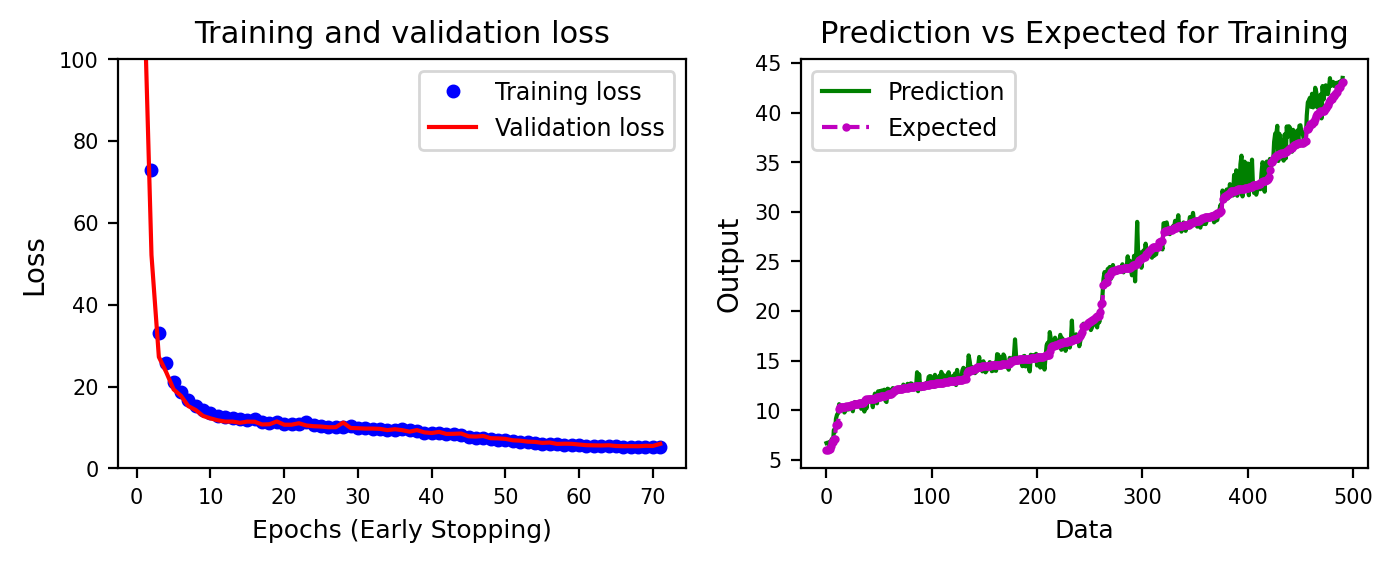

In [31]:
plot_NN(model_DNN,history,Smaller_Training,Smaller_Training_Target)

In [32]:
# Accuracy on test set
X_test = test_set.drop("Heating Load", axis=1)
y_test = test_set["Heating Load"].values
#
X_test_Std=scaler.transform(X_test)
#
pred=model_DNN.predict(X_test_Std)

mse= mean_squared_error(pred, y_test)
rmse= np.sqrt(mse)

print('rmse of all training of Test: ',rmse)

rmse of all training of Test:  0.9441161155280955
